## Cleanup

In [1]:
%%bash
rm -rf resources

## Setup

In [2]:
import os
import tensorflow as tf
import tensorflow.contrib.slim as slim
import tensorflow.contrib.slim.nets as nets

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Use the retry module or similar alternatives.


In [3]:
tf.logging.set_verbosity(tf.logging.ERROR)
sess = tf.InteractiveSession()

First, we set up the input image. We use a tf.Variable instead of a tf.placeholder because we will need it to be trainable. We can still feed it when we want to.

In [4]:
image = tf.Variable(tf.zeros((299, 299, 3)))

Next, we load the Inception v3 model.

In [5]:
def inception(image, reuse):
    preprocessed = tf.multiply(tf.subtract(tf.expand_dims(image, 0), 0.5), 2.0)
    arg_scope = nets.inception.inception_v3_arg_scope(weight_decay=0.0)
    with slim.arg_scope(arg_scope):
        logits, _ = nets.inception.inception_v3(
            preprocessed, 1001, is_training=False, reuse=reuse)
        logits = logits[:,1:] # ignore background class
        probs = tf.nn.softmax(logits) # probabilities
    return logits, probs

logits, probs = inception(image, reuse=False)

In [6]:
%%bash
wget 'http://download.tensorflow.org/models/inception_v3_2016_08_28.tar.gz' -P resources
tar -xf resources/inception_v3_2016_08_28.tar.gz -C resources

--2018-05-25 08:58:55--  http://download.tensorflow.org/models/inception_v3_2016_08_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 74.125.124.128, 2607:f8b0:4001:c14::80
Connecting to download.tensorflow.org (download.tensorflow.org)|74.125.124.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100885009 (96M) [application/x-tar]
Saving to: ‘resources/inception_v3_2016_08_28.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  178M 1s
    50K .......... .......... .......... .......... ..........  0%  259M 0s
   100K .......... .......... .......... .......... ..........  0%  312M 0s
   150K .......... .......... .......... .......... ..........  0%  209M 0s
   200K .......... .......... .......... .......... ..........  0%  224M 0s
   250K .......... .......... .......... .......... ..........  0%  419M 0s
   300K .......... .......... .......... .......... ..........  0%  104M 0s
   350K .......... ..........

In [7]:
data_dir="./resources"
restore_vars = [
    var for var in tf.global_variables()
    if var.name.startswith('InceptionV3/')
]
saver = tf.train.Saver(restore_vars)
saver.restore(sess, os.path.join(data_dir, 'inception_v3.ckpt'))

In [8]:
import json
import matplotlib.pyplot as plt

In [9]:
%%bash
wget 'http://www.anishathalye.com/media/2017/07/25/imagenet.json' -P resources
tar -xf resources/inception_v3_2016_08_28.tar.gz -C resources

--2018-05-25 08:58:58--  http://www.anishathalye.com/media/2017/07/25/imagenet.json
Resolving www.anishathalye.com (www.anishathalye.com)... 185.199.111.153, 185.199.110.153, 185.199.109.153, ...
Connecting to www.anishathalye.com (www.anishathalye.com)|185.199.111.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.anishathalye.com/media/2017/07/25/imagenet.json [following]
--2018-05-25 08:58:59--  https://www.anishathalye.com/media/2017/07/25/imagenet.json
Connecting to www.anishathalye.com (www.anishathalye.com)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 28678 (28K) [application/json]
Saving to: ‘resources/imagenet.json’

     0K .......... .......... ........                        100% 2.28M=0.01s

2018-05-25 08:58:59 (2.28 MB/s) - ‘resources/imagenet.json’ saved [28678/28678]



In [10]:
imagenet_json="resources/imagenet.json"
with open(imagenet_json) as f:
    imagenet_labels = json.load(f)

In [11]:
def classify(img, correct_class=None, target_class=None):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
    fig.sca(ax1)
    p = sess.run(probs, feed_dict={image: img})[0]
    ax1.imshow(img)
    fig.sca(ax1)
    
    topk = list(p.argsort()[-10:][::-1])
    topprobs = p[topk]
    barlist = ax2.bar(range(10), topprobs)
    if target_class in topk:
        barlist[topk.index(target_class)].set_color('r')
    if correct_class in topk:
        barlist[topk.index(correct_class)].set_color('g')
    plt.sca(ax2)
    plt.ylim([0, 1.1])
    plt.xticks(range(10),
               [imagenet_labels[i][:15] for i in topk],
               rotation='vertical')
    fig.subplots_adjust(bottom=0.2)
    plt.show()

## Example image

In [12]:
import PIL
import numpy as np

In [13]:
%%bash
wget 'http://www.anishathalye.com/media/2017/07/25/cat.jpg' -P resources
tar -xf resources/inception_v3_2016_08_28.tar.gz -C resources

--2018-05-25 08:59:00--  http://www.anishathalye.com/media/2017/07/25/cat.jpg
Resolving www.anishathalye.com (www.anishathalye.com)... 185.199.111.153, 185.199.110.153, 185.199.109.153, ...
Connecting to www.anishathalye.com (www.anishathalye.com)|185.199.111.153|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.anishathalye.com/media/2017/07/25/cat.jpg [following]
--2018-05-25 08:59:00--  https://www.anishathalye.com/media/2017/07/25/cat.jpg
Connecting to www.anishathalye.com (www.anishathalye.com)|185.199.111.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 283839 (277K) [image/jpeg]
Saving to: ‘resources/cat.jpg’

     0K .......... .......... .......... .......... .......... 18% 2.20M 0s
    50K .......... .......... .......... .......... .......... 36% 5.31M 0s
   100K .......... .......... .......... .......... .......... 54% 13.7M 0s
   150K .......... .......... .......... .......... .......... 72%

In [14]:
img_path = 'resources/cat.jpg'
img_class = 281
img = PIL.Image.open(img_path)
big_dim = max(img.width, img.height)
wide = img.width > img.height
new_w = 299 if not wide else int(img.width * 299 / img.height)
new_h = 299 if wide else int(img.height * 299 / img.width)
img = img.resize((new_w, new_h)).crop((0, 0, 299, 299))
img = (np.asarray(img) / 255.0).astype(np.float32)

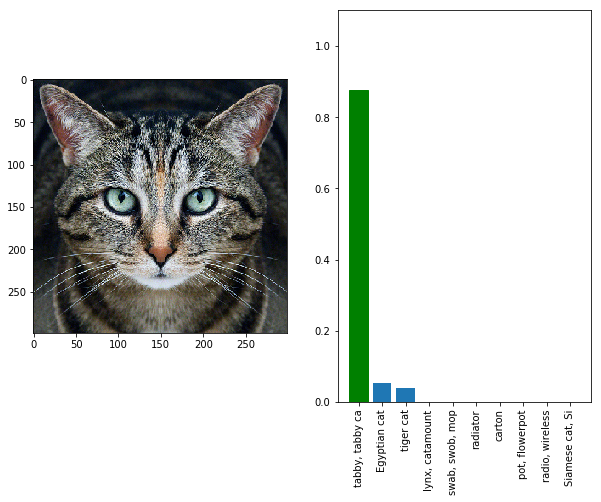

In [15]:
classify(img, correct_class=img_class)

# Adversarial examples

In [16]:
x = tf.placeholder(tf.float32, (299, 299, 3))

x_hat = image # our trainable adversarial input
assign_op = tf.assign(x_hat, x)

In [17]:
learning_rate = tf.placeholder(tf.float32, ())
y_hat = tf.placeholder(tf.int32, ())

labels = tf.one_hot(y_hat, 1000)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=[labels])
optim_step = tf.train.GradientDescentOptimizer(
    learning_rate).minimize(loss, var_list=[x_hat])

In [18]:
epsilon = tf.placeholder(tf.float32, ())

below = x - epsilon
above = x + epsilon
projected = tf.clip_by_value(tf.clip_by_value(x_hat, below, above), 0, 1)
with tf.control_dependencies([projected]):
    project_step = tf.assign(x_hat, projected)

In [30]:
demo_epsilon = 2.0/255.0 # a really small perturbation
demo_lr = 1e-1
demo_steps = 100
demo_target = 924 # "guacamole"

# initialization step
sess.run(assign_op, feed_dict={x: img})

# projected gradient descent
for i in range(demo_steps):
    # gradient descent step
    _, loss_value = sess.run(
        [optim_step, loss],
        feed_dict={learning_rate: demo_lr, y_hat: demo_target})
    # project step
    sess.run(project_step, feed_dict={x: img, epsilon: demo_epsilon})
    if (i+1) % 10 == 0:
        print('step %d, loss=%g' % (i+1, loss_value))
    

adv = x_hat.eval() # retrieve the adversarial example

step 10, loss=8.56837
step 20, loss=7.53042
step 30, loss=6.73003
step 40, loss=5.96762
step 50, loss=5.39644
step 60, loss=3.24552
step 70, loss=1.30032
step 80, loss=0.126166
step 90, loss=0.0628303
step 100, loss=0.038809
step 110, loss=0.0266269
step 120, loss=0.0235444
step 130, loss=0.0208111
step 140, loss=0.0188163
step 150, loss=0.0167464
step 160, loss=0.0146628
step 170, loss=0.0139403
step 180, loss=0.0129389
step 190, loss=0.011696
step 200, loss=0.0112486
step 210, loss=0.0102055
step 220, loss=0.0094494
step 230, loss=0.00865317
step 240, loss=0.00818317
step 250, loss=0.00757062
step 260, loss=0.00731871
step 270, loss=0.00685897
step 280, loss=0.00663921
step 290, loss=0.00648785
step 300, loss=0.00621079
step 310, loss=0.00594538
step 320, loss=0.00575848
step 330, loss=0.00560119
step 340, loss=0.00543521
step 350, loss=0.00528451
step 360, loss=0.0051307
step 370, loss=0.00501861
step 380, loss=0.00496037
step 390, loss=0.00490616
step 400, loss=0.00475384
step 410,

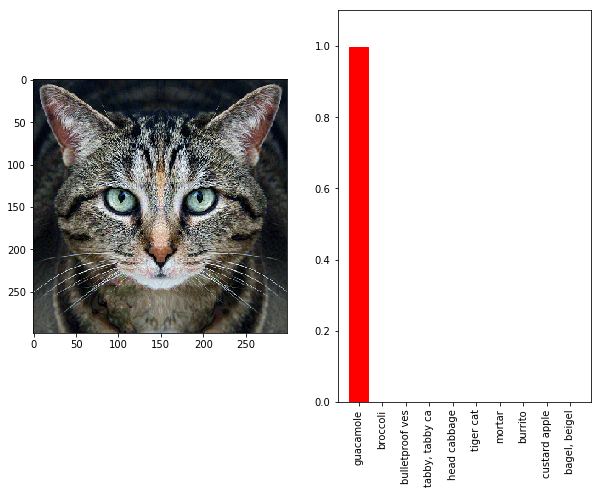

In [32]:
classify(adv, correct_class=img_class, target_class=demo_target)

# Robust adversarial examples

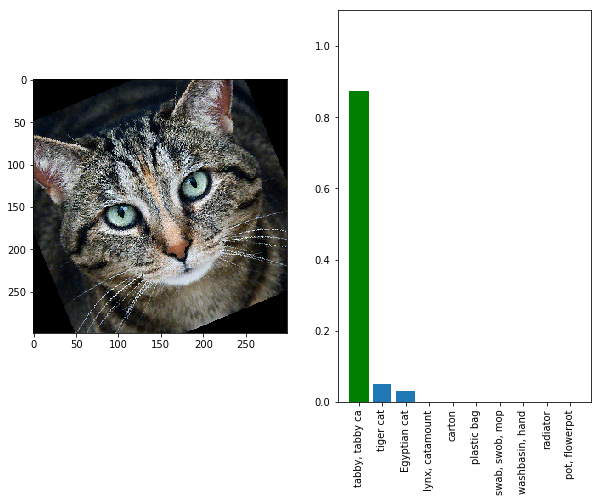

In [21]:
ex_angle = np.pi/8

angle = tf.placeholder(tf.float32, ())
rotated_image = tf.contrib.image.rotate(image, angle)
rotated_example = rotated_image.eval(feed_dict={image: adv, angle: ex_angle})
classify(rotated_example, correct_class=img_class, target_class=demo_target)

In [22]:
num_samples = 10
average_loss = 0
for i in range(num_samples):
    rotated = tf.contrib.image.rotate(
        image, tf.random_uniform((), minval=-np.pi/4, maxval=np.pi/4))
    rotated_logits, _ = inception(rotated, reuse=True)
    average_loss += tf.nn.softmax_cross_entropy_with_logits(
        logits=rotated_logits, labels=labels) / num_samples

In [23]:
optim_step = tf.train.GradientDescentOptimizer(
    learning_rate).minimize(average_loss, var_list=[x_hat])

In [27]:
demo_epsilon = 8.0/255.0 # still a pretty small perturbation
demo_lr = 2e-1
demo_steps = 300
demo_target = 924 # "guacamole"

# initialization step
sess.run(assign_op, feed_dict={x: img})

# projected gradient descent
for i in range(demo_steps):
    # gradient descent step
    _, loss_value = sess.run(
        [optim_step, average_loss],
        feed_dict={learning_rate: demo_lr, y_hat: demo_target})
    # project step
    sess.run(project_step, feed_dict={x: img, epsilon: demo_epsilon})
    if (i+1) % 50 == 0:
        print('step %d, loss=%g' % (i+1, loss_value))
    

adv_robust = x_hat.eval() # retrieve the adversarial example

step 50, loss=0.0273848
step 100, loss=0.00691435
step 150, loss=0.00713929
step 200, loss=0.00569545
step 250, loss=0.00238699
step 300, loss=0.0028537


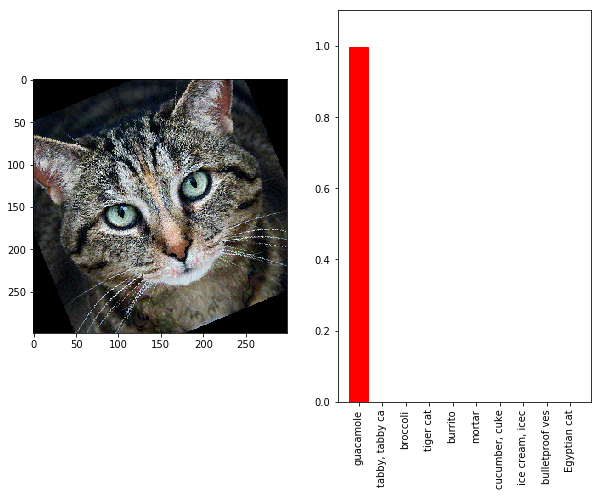

In [29]:
rotated_example = rotated_image.eval(feed_dict={image: adv_robust, angle: ex_angle})
classify(rotated_example, correct_class=img_class, target_class=demo_target)

## Evaluation

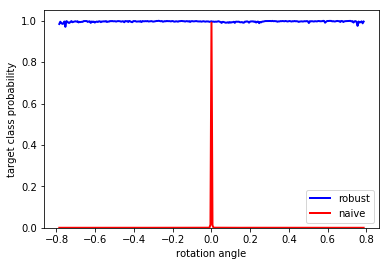

In [26]:
thetas = np.linspace(-np.pi/4, np.pi/4, 301)

p_naive = []
p_robust = []
for theta in thetas:
    rotated = rotated_image.eval(feed_dict={image: adv_robust, angle: theta})
    p_robust.append(probs.eval(feed_dict={image: rotated})[0][demo_target])
    
    rotated = rotated_image.eval(feed_dict={image: adv, angle: theta})
    p_naive.append(probs.eval(feed_dict={image: rotated})[0][demo_target])

robust_line, = plt.plot(thetas, p_robust, color='b', linewidth=2, label='robust')
naive_line, = plt.plot(thetas, p_naive, color='r', linewidth=2, label='naive')
plt.ylim([0, 1.05])
plt.xlabel('rotation angle')
plt.ylabel('target class probability')
plt.legend(handles=[robust_line, naive_line], loc='lower right')
plt.show()